<a href="https://colab.research.google.com/github/bingsen-wang/Python-Examples/blob/main/PythonExample_Simulation_3_PhaseRLload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Python Example: 3-Phase RL Load Fed by 3-Phase AC Sources</h1></b>

Dr. Bingsen Wang

7/5/2025
</center>

#Python Code

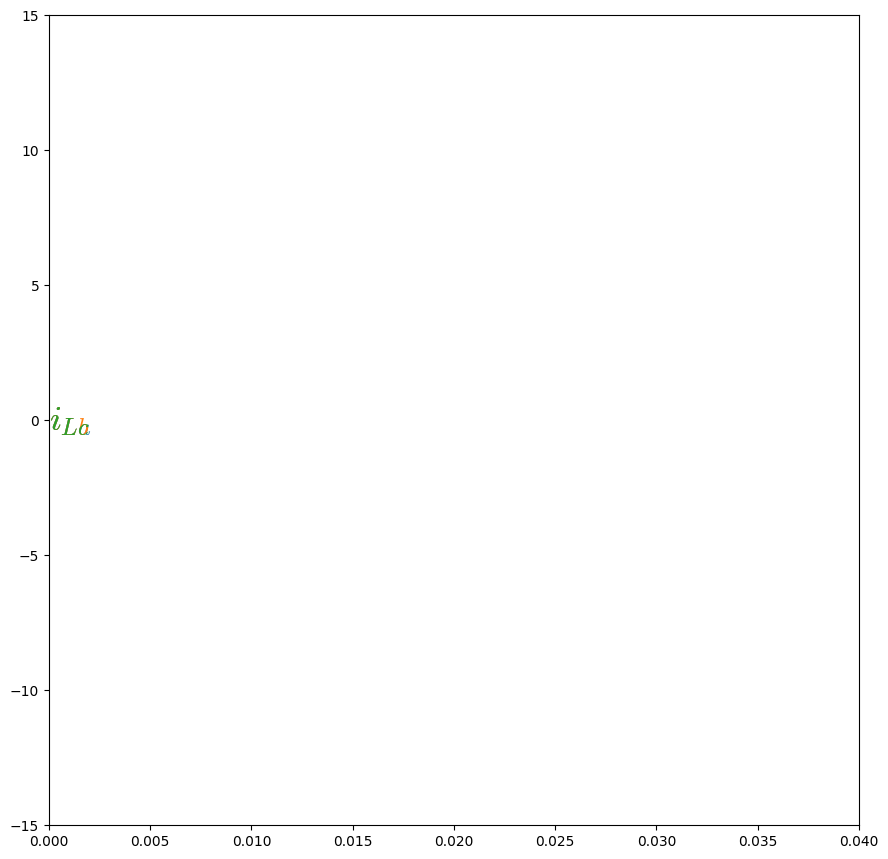

In [40]:
from matplotlib import pyplot,animation,cm
import numpy as np; from scipy.integrate import odeint
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

def sys(x,t,R,L,Vll_rms,omega): #system dynamic equations
  return [(np.sqrt(2/3)*Vll_rms*np.cos(omega*t-k*np.pi*2/3)-R*x[k])/L for k in range(3)]

#RL Parameters
R=5; L=.05;Vll_rms=230;omega = 2*np.pi*60;iL0=np.array([0,0,0]);Nf=600
#simulation by odeint
t=np.linspace(0,4*L/R,Nf); iL=odeint(sys,iL0,t,args=(R,L,Vll_rms,omega))

cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]));
ax = fig.add_axes([.05,.05,.9,.9],xlim=[0,max(t)],ylim=[-15,15])
lines=[ax.plot([],[],c=cl[k],lw=3)[0] for k in range(3)]
txts=[ax.text(0,0,'$i_{L'+['a','b','c'][k]+'}$',size=25,c=cl[k],va='center')for k in range(3)]

def update(i):
  [lines[k].set_data(t[:i+1],iL[:i+1,k]) for k in range(3)]
  [txts[k].set_position((t[i],iL[i,k])) for k in range(3)]
  return
anim = animation.FuncAnimation(fig, update, frames=Nf, interval=20)
anim.save("3phaseRL.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)